<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/N_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO)_Val_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [3]:
uploaded = files.upload()   

Saving airlines2.txt to airlines2.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))

In [5]:
uploaded = files.upload()

Saving airlines2_ARIMA.txt to airlines2_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['airlines2_ARIMA.txt']))

In [7]:
uploaded = files.upload()

Saving airlines2_r.txt to airlines2_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['airlines2_r.txt']))

In [9]:
data_r.describe()

,Residuo
count,144.000000
mean,2.832599
std,29.757948
min,-86.729834
25%,-15.400285
50%,0.233500
75%,24.658117
max,81.595276


Original time series:



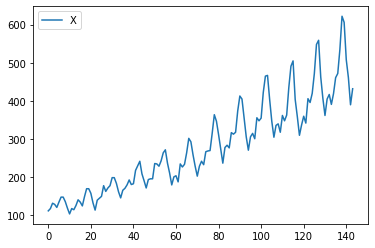

In [10]:
print('Original time series:\n')
data.plot()

Residuals over time:



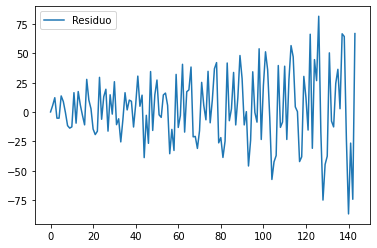

In [11]:
print('Residuals over time:\n')
data_r.plot()

In [12]:
len(data)

144

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [14]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

      Residuo   Residuo   Residuo  ...   Residuo   Residuo   Residuo
0    0.515917       NaN       NaN  ...       NaN       NaN       NaN
1    0.548651  0.515917       NaN  ...       NaN       NaN       NaN
2    0.587900  0.548651  0.515917  ...       NaN       NaN       NaN
3    0.484460  0.587900  0.548651  ...       NaN       NaN       NaN
4    0.484363  0.484460  0.587900  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
139  0.376937  0.897451  0.911189  ...  0.250371  0.070000  0.413713
140  0.000000  0.376937  0.897451  ...  0.292054  0.250371  0.070000
141  0.358242  0.000000  0.376937  ...  0.814766  0.292054  0.250371
142  0.073976  0.358242  0.000000  ...  0.469495  0.814766  0.292054
143  0.912230  0.073976  0.358242  ...  0.440188  0.469495  0.814766

[144 rows x 13 columns]


In [15]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3939, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5384, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


24
28
80


In [16]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

          ARIMA       ARIMA       ARIMA  ...       ARIMA       ARIMA       ARIMA
0    111.888000         NaN         NaN  ...         NaN         NaN         NaN
1    112.378158  111.888000         NaN  ...         NaN         NaN         NaN
2    119.771433  112.378158  111.888000  ...         NaN         NaN         NaN
3    134.183102  119.771433  112.378158  ...         NaN         NaN         NaN
4    126.199377  134.183102  119.771433  ...         NaN         NaN         NaN
..          ...         ...         ...  ...         ...         ...         ...
139  629.281833  557.666302  468.353843  ...  451.586191  537.947070  576.091574
140  594.729834  629.281833  557.666302  ...  399.569768  451.586191  537.947070
141  487.428775  594.729834  629.281833  ...  354.584335  399.569768  451.586191
142  464.277816  487.428775  594.729834  ...  424.702000  354.584335  399.569768
143  365.178562  464.277816  487.428775  ...  403.635172  424.702000  354.584335

[144 rows x 13 columns]


In [17]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3939, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.5384, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

24
28
80


In [18]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

       X      X      X      X      X  ...      X      X      X      X      X
0    112    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
1    118  112.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2    132  118.0  112.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3    129  132.0  118.0  112.0    NaN  ...    NaN    NaN    NaN    NaN    NaN
4    121  129.0  132.0  118.0  112.0  ...    NaN    NaN    NaN    NaN    NaN
..   ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
139  606  622.0  535.0  472.0  461.0  ...  405.0  362.0  407.0  463.0  559.0
140  508  606.0  622.0  535.0  472.0  ...  417.0  405.0  362.0  407.0  463.0
141  461  508.0  606.0  622.0  535.0  ...  391.0  417.0  405.0  362.0  407.0
142  390  461.0  508.0  606.0  622.0  ...  419.0  391.0  417.0  405.0  362.0
143  432  390.0  461.0  508.0  606.0  ...  461.0  419.0  391.0  417.0  405.0

[144 rows x 13 columns]


In [19]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3939, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.5384, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

24
28
80


In [0]:
def pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    mse_residuals_val = []
    final_experiment_predictions = []
    final_experiment_predictions_val = []

    last_configurations = []
    
    average_particles = []
    average_particles_val = []
    mse_averages = []
    mse_averages_val = []
    final_experiment_averages = []
    final_experiment_averages_val = []

    median_particles = []
    median_particles_val = []
    mse_medians = []
    mse_medians_val = []
    final_experiment_medians = []
    final_experiment_medians_val = []

    average_k_best_predictions = []
    average_k_best_predictions_val = []
    mse_averages_k_best = []
    mse_averages_k_best_val = []
    final_experiment_k_averages = []
    final_experiment_k_averages_val = []

    median_k_best_predictions = []
    median_k_best_predictions_val = []
    mse_medians_k_best = []
    mse_medians_k_best_val = []
    final_experiment_k_medians = []
    final_experiment_k_medians_val = []

    mse_ARIMA = []
    mse_ARIMA_val = []
    
    mse_ensemble = []
    mse_ensemble_val = []

    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              
                # Starting Regression
                rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

                # Fitting the curve
                rgs.fit(X_train, y_train)
                y_predict = rgs.predict(X_val)

                # Using Mean Squared Error to verify prediction accuracy
                mse = mean_squared_error(y_val, y_predict) 

                # If mse value for that search point, for that particle,
                # is less than its personal best point,
                # replace personal best
                if(mse < p_best_val[j]):   
                    # The value below represents the current least Mean Squared Error
                    p_best_val[j] = mse
                    
                    # The value below represents the current least Regressor
                    p_best_RGS[j] = rgs
                                

                    # The value below represents the current search coordinates for
                    # the particle's current least Mean Squared Error found
                    p_best[j] = c[j].copy()
                    
                # Using auxiliar variable to get the index of the
                # particle that found the configuration with the 
                # minimum MSE value
                aux = np.argmin(p_best_val)        
              
                if(p_best_val[aux] < g_best_val):
                    # Assigning Particle's current best MSE to the Group's best    
                    g_best_val = p_best_val[aux]

                    # Assigning Particle's current best configuration to the Group's best
                    g_best = p_best[aux].copy()

                    # Group best regressor:
                    # the combination of C, Epsilon and Gamma
                    # that computes the best fitting curve
                    g_best_RGS = p_best_RGS[aux]

              
                rand1 = np.random.random()
                rand2 = np.random.random()

                # The variable below influences directly the particle's velocity.
                # It can either make it smaller or bigger. 
                w = inertia

                # The equation below represents Particle's velocity, which is
                # the rate of change in its position
                v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

                # Change in the Particle's position 
                c[j] = c[j] + v[j]

                # Below is a series of conditions that stop the particles from
                # leaving the search space
                if(c[j][2] < min_g):
                  c[j][2] = min_g
                if(c[j][2] > max_g):
                  c[j][2] = max_g
                if(c[j][1] < min_e):
                  c[j][1] = min_e
                if(c[j][1] > max_e):
                  c[j][1] = max_e
                if(c[j][0] < min_c):
                  c[j][0] = min_c
                if(c[j][0] > max_c):
                  c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_val = g_best_RGS.predict(X_val)
        
        predict_test = g_best_RGS.predict(X_test)

     
        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

      
        mse_r_val = mean_squared_error(y_val, predict_val)
        mse_r = mean_squared_error(y_test, predict_test)
        
   
        mse_residuals_val.append(mse_r_val)
        mse_residuals.append(mse_r)

       
        # Taking all particles' final predictions,
        # getting their averages and medians and
        # getting the k best subset of particles
        # to see the final prediction without outliers
        k = k_best_particles
        average_p_val, median_p_val, av_k_best_p_val, md_k_best_p_val = particles_last_predictions(c, n_particles, k, X_val, y_val)
        average_p, median_p, av_k_best_p, md_k_best_p = particles_last_predictions(c, n_particles, k, X_test, y_test)
       
        average_particles_val.append(average_p_val)
        median_particles_val.append(median_p_val)
        average_k_best_predictions_val.append(av_k_best_p_val)
        median_k_best_predictions_val.append(md_k_best_p_val)
             
        average_particles.append(average_p)
        median_particles.append(median_p)
        average_k_best_predictions.append(av_k_best_p)
        median_k_best_predictions.append(md_k_best_p)
       
        mse_e_val, mse_AR_val = residual_performance(predict_val, y_val_ARIMA, y_val_raw)
       
        mse_e, mse_AR = residual_performance(predict_test, y_test_ARIMA, y_test_raw)
       
        # Storing the Ensemble's (final system) mse
        mse_ARIMA_val.append(mse_AR_val)
        mse_ensemble_val.append(mse_e_val)
        
        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)
     
        # Storing the mse of the average predictions
        mse_A_val, mse_AR_val = residual_performance(average_p_val, y_val_ARIMA, y_val_raw)
        mse_A, mse_AR = residual_performance(average_p, y_test_ARIMA, y_test_raw)
   
        mse_averages_val.append(mse_A_val)
        mse_averages.append(mse_A)
       
        # Storing the mse of the average k best predictions
        mse_A_k_best_val, mse_AR_val = residual_performance(av_k_best_p_val, y_val_ARIMA, y_val_raw)
        mse_A_k_best, mse_AR = residual_performance(av_k_best_p, y_test_ARIMA, y_test_raw)
        
        mse_averages_k_best_val.append(mse_A_k_best_val)
        mse_averages_k_best.append(mse_A_k_best)
        
        # Storing the mse of the median predictions
        mse_M_val, mse_AR_val = residual_performance(median_p_val, y_val_ARIMA, y_val_raw)
        mse_M, mse_AR = residual_performance(median_p, y_test_ARIMA, y_test_raw)
        
        mse_medians_val.append(mse_M_val)
        mse_medians.append(mse_M)
        
        # Storing the mse of the median k best predictions
        mse_M_k_best_val, mse_AR_val = residual_performance(md_k_best_p_val, y_val_ARIMA, y_val_raw)
        mse_M_k_best, mse_AR = residual_performance(md_k_best_p, y_test_ARIMA, y_test_raw)
      
        mse_medians_k_best_val.append(mse_M_k_best_val)
        mse_medians_k_best.append(mse_M_k_best)
      
        # Getting the final results of the current experiment
        # and storing them
        final_exp_p_val, final_exp_av_val, final_exp_md_val, final_exp_av_k_val, final_exp_md_k_val = results(g_best_RGS, average_p_val, median_p_val, av_k_best_p_val, md_k_best_p_val, y_val_raw, y_val_ARIMA, X_val)
               

        final_exp_p, final_exp_av, final_exp_md, final_exp_av_k, final_exp_md_k = results(g_best_RGS, average_p, median_p, av_k_best_p, md_k_best_p, y_test_raw, y_test_ARIMA, X_test)
        
     

        final_exp_p_val = final_exp_p_val.tolist()
        final_exp_av_val = final_exp_av_val.tolist()
        final_exp_md_val = final_exp_md_val.tolist()
        final_exp_av_k_val = final_exp_av_k_val.tolist()
        final_exp_md_k_val = final_exp_md_k_val.tolist()
     
        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()
        final_exp_av_k = final_exp_av_k.tolist()
        final_exp_md_k = final_exp_md_k.tolist()
      
                
        final_experiment_predictions_val.append(final_exp_p_val)
        final_experiment_averages_val.append(final_exp_av_val)
        final_experiment_medians_val.append(final_exp_md_val)
        final_experiment_k_averages_val.append(final_exp_av_k_val)
        final_experiment_k_medians_val.append(final_exp_md_k_val)
     
        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)
        final_experiment_k_averages.append(final_exp_av_k)
        final_experiment_k_medians.append(final_exp_md_k)
      
        print('\nExperiment # %d: done. MSE_g_Best_val: %f; MSE_AV_val: %f; MSE_MD_val: %f; MSE_k_AV_val: %f; MSE_k_MD_val: %f\n'%(e+1, mse_e_val, mse_A_val, mse_M_val, mse_A_k_best_val,mse_M_k_best_val))
        print('\nMSE_g_Best: %f; MSE_AV: %f; MSE_MD: %f; MSE_k_AV: %f; MSE_k_MD: %f\n'%(mse_e, mse_A, mse_M, mse_A_k_best, mse_M_k_best)) 
                                                                             
                                                                              

    aux_result_1_val = np.argmin(mse_ensemble_val)
    aux_result_1 = np.argmin(mse_ensemble)

    mse_final_val = mse_ensemble_val[aux_result_1_val]
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2_val = np.argmin(mse_residuals_val)
    aux_result_2 = np.argmin(mse_residuals)

    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]

    probable_best_predictions_val = final_experiment_predictions_val[aux_result_2_val]
    probable_best_predictions = final_experiment_predictions[aux_result_2]

    corresponding_average_val = final_experiment_averages_val[aux_result_2_val]
    corresponding_average = final_experiment_averages[aux_result_2]

    corresponding_median_val = final_experiment_medians_val[aux_result_2_val]
    corresponding_median = final_experiment_medians[aux_result_2]

    corresponding_k_average_val = final_experiment_k_averages_val[aux_result_2_val]
    corresponding_k_average = final_experiment_k_averages[aux_result_2]

    corresponding_k_median_val = final_experiment_k_medians_val[aux_result_2_val]
    corresponding_k_median = final_experiment_k_medians[aux_result_2]

    #print('Debug 2')
    print(color.BOLD + '\n Displaying Results for the validation set\n' + color.BOLD)

    display_results(best_regression, y_val_raw, y_val_ARIMA, 
                    probable_best_predictions_val, corresponding_average_val, corresponding_median_val, 
                    corresponding_k_average_val, corresponding_k_median_val,c)

    
    print(color.BOLD + '\n Displaying Results for the test set\n' + color.BOLD)
    display_results(best_regression, y_test_raw, y_test_ARIMA, 
                    probable_best_predictions, corresponding_average, corresponding_median, 
                    corresponding_k_average, corresponding_k_median,c)
                    


    
    final_experiment_predictions_val_T = list(map(list, zip(*final_experiment_predictions_val)))
    final_experiment_averages_val_T = list(map(list, zip(*final_experiment_averages_val)))
    final_experiment_medians_val_T = list(map(list, zip(*final_experiment_medians_val)))
    final_experiment_k_averages_val_T = list(map(list, zip(*final_experiment_k_averages_val)))
    final_experiment_k_medians_val_T = list(map(list, zip(*final_experiment_k_medians_val)))


    final_experiment_predictions_T = list(map(list, zip(*final_experiment_predictions)))
    final_experiment_averages_T = list(map(list, zip(*final_experiment_averages)))
    final_experiment_medians_T = list(map(list, zip(*final_experiment_medians)))
    final_experiment_k_averages_T = list(map(list, zip(*final_experiment_k_averages)))
    final_experiment_k_medians_T = list(map(list, zip(*final_experiment_k_medians)))

    
    final_experiment_predictions_concat_val = [item for sublist in final_experiment_predictions_val for item in sublist] 
    final_experiment_averages_concat_val = [item for sublist in final_experiment_averages_val for item in sublist]
    final_experiment_medians_concat_val = [item for sublist in final_experiment_medians_val for item in sublist]
    final_experiment_k_averages_concat_val = [item for sublist in final_experiment_k_averages_val for item in sublist]
    final_experiment_k_medians_concat_val = [item for sublist in final_experiment_k_medians_val for item in sublist]


    final_experiment_predictions_concat = [item for sublist in final_experiment_predictions for item in sublist] 
    final_experiment_averages_concat = [item for sublist in final_experiment_averages for item in sublist]
    final_experiment_medians_concat = [item for sublist in final_experiment_medians for item in sublist]
    final_experiment_k_averages_concat = [item for sublist in final_experiment_k_averages for item in sublist]
    final_experiment_k_medians_concat = [item for sublist in final_experiment_k_medians for item in sublist]


    print(color.BOLD + '\nBest G-best on val set: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1_val+1, mse_final_val) + color.BOLD )  

    print(color.BOLD + '\nBest G-best on test set: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )


    pd.options.display.float_format = '${:,.2f}'.format
    final_results_val_T = pd.DataFrame()
        
    final_results_val_T["Previsoes com o G_Best (Sistema Final)"] = ''
    for p in range(len(y_val)):
        final_results_val_T["G_best_" + str(p+1)] = final_experiment_predictions_val_T[p]

    final_results_val_T["Previsoes com as Medias"] = ''
    for p in range(len(y_val)):
        final_results_val_T["Av_" + str(p+1)] = final_experiment_averages_val_T[p]

    final_results_val_T["Previsoes com as Medianas"] = ''
    for p in range(len(y_val)):
        final_results_val_T["Md_" + str(p+1)] = final_experiment_medians_val_T[p]

    final_results_val_T["Previsoes com a Media das K melhores particulas"] = ''
    for p in range(len(y_val)):       
        final_results_val_T["K_Av_" + str(p+1)] = final_experiment_k_averages_val_T[p]

    final_results_val_T["Previsoes com a Mediana das K melhores particulas"] = ''
    for p in range(len(y_val)):       
        final_results_val_T["K_Md_" + str(p+1)] = final_experiment_k_medians_val_T[p]

    
    
    pd.options.display.float_format = '${:,.2f}'.format
    final_results_T = pd.DataFrame()
        
    final_results_T["Previsoes com o G_Best (Sistema Final)"] = ''
    for p in range(len(y_test)):
        final_results_T["G_best_" + str(p+1)] = final_experiment_predictions_T[p]

    final_results_T["Previsoes com as Medias"] = ''
    for p in range(len(y_test)):
        final_results_T["Av_" + str(p+1)] = final_experiment_averages_T[p]

    final_results_T["Previsoes com as Medianas"] = ''
    for p in range(len(y_test)):
        final_results_T["Md_" + str(p+1)] = final_experiment_medians_T[p]

    final_results_T["Previsoes com a Media das K melhores particulas"] = ''
    for p in range(len(y_test)):       
        final_results_T["K_Av_" + str(p+1)] = final_experiment_k_averages_T[p]

    final_results_T["Previsoes com a Mediana das K melhores particulas"] = ''
    for p in range(len(y_test)):       
        final_results_T["K_Md_" + str(p+1)] = final_experiment_k_medians_T[p]


    pd.options.display.float_format = '${:,.2f}'.format
    final_results_val = pd.DataFrame()
        
    final_results_val["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat_val
    final_results_val["Previsoes com as Medias"] = final_experiment_averages_concat_val
    final_results_val["Previsoes com as Medianas"] = final_experiment_medians_concat_val
    final_results_val["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat_val
    final_results_val["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat_val

    
    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()
        
    final_results["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat
    final_results["Previsoes com as Medias"] = final_experiment_averages_concat
    final_results["Previsoes com as Medianas"] = final_experiment_medians_concat
    final_results["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat
    final_results["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat
    

    final_mse_val = pd.DataFrame()
    
    final_mse_val["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse_val["MSE da Previsao do Sistema Final"] = mse_ensemble_val
    final_mse_val["MSE da Previsao das Medias"] = mse_averages_val
    final_mse_val["MSE da Previsao das Medianas"] = mse_medians_val
    final_mse_val["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best_val
    final_mse_val["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best_val
    final_mse_val["MSE da Previsao do ARIMA"] = mse_ARIMA_val


    final_mse = pd.DataFrame()
    
    final_mse["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_mse["MSE da Previsao das Medias"] = mse_averages
    final_mse["MSE da Previsao das Medianas"] = mse_medians
    final_mse["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best
    final_mse["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best
    final_mse["MSE da Previsao do ARIMA"] = mse_ARIMA

    final_results_val_T.to_csv("T_Val_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results_T.to_csv("T_Test_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results_val.to_csv("Val_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse_val.to_csv("Val_MSE_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results.to_csv("Test_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse.to_csv("Test_MSE_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

In [0]:
def results(regression, average, median, k_average, k_median, y_raw, y_ARIMA, X_residual):
    
    import numpy as np

    data = y_raw
    ARIMA = y_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_residual

    average_residuals = average
    median_residuals = median

    k_average_residuals = k_average
    k_median_residuals = k_median
    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A_k = k_average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M_k = k_median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    final_predictions_average_k = ARIMA + residuals_A_k
    final_predictions_median_k = ARIMA + residuals_M_k
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median, final_predictions_average_k, final_predictions_median_k


In [0]:
def display_results(configuration, y_raw, y_ARIMA,
                    final_predictions, final_predictions_average, final_predictions_median,  
                    final_predictions_k_average, final_predictions_k_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_raw
    ARIMA = y_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)
    mse_k_A = mean_squared_error(final_predictions_k_average, data)
    mse_k_M = mean_squared_error(final_predictions_k_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_A)   
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    print('\nMean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_M)


    print('\nBest Configuration Found:\n')
    print(configuration)

    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    plot_results(ARIMA, y_raw)  


    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions, y_raw)


    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_average, y_raw)

    
    print(color.BOLD + '\nEnsemble Model K best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_average, y_raw)


    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_median, y_raw)

    
    print(color.BOLD + '\nEnsemble Model K best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_median, y_raw)

    print('\n')
    print('\n')

In [0]:
def plot_results(predictions, y_raw):

    plt.plot(range(len(y_raw)), y_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles, k, X, y):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []
    mse = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_train, y_train) 
        y_predict = rgs.predict(X) 

        mse.append(mean_squared_error(y_predict, y))
        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')

    median = [st.median(num) for num in zip(*predictions)]

    predictions = np.array(predictions)
    id_k = np.argpartition(mse, k)
    k_best_pred = predictions[id_k[:k]]

    k_total = [sum(x) for x in zip(*k_best_pred)]

    av_k_best_pred = [num/k for num in k_total]

    md_k_best_pred = [st.median(num) for num in zip(*k_best_pred)]
    #print('Debug inside 5')


    return average, median, av_k_best_pred, md_k_best_pred

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'b')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

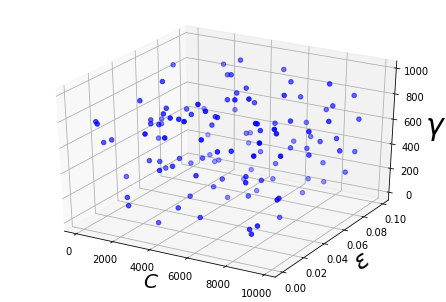






Experiment # 1: done. MSE_g_Best_val: 249.127703; MSE_AV_val: 364.104466; MSE_MD_val: 295.351889; MSE_k_AV_val: 249.849557; MSE_k_MD_val: 259.485847


MSE_g_Best: 793.638003; MSE_AV: 935.221477; MSE_MD: 844.041041; MSE_k_AV: 777.527602; MSE_k_MD: 778.198454


Experiment # 2: done. MSE_g_Best_val: 249.351320; MSE_AV_val: 341.619103; MSE_MD_val: 287.980733; MSE_k_AV_val: 249.178559; MSE_k_MD_val: 251.764635


MSE_g_Best: 795.723254; MSE_AV: 901.561231; MSE_MD: 836.744587; MSE_k_AV: 778.179431; MSE_k_MD: 782.860112


Experiment # 3: done. MSE_g_Best_val: 249.236460; MSE_AV_val: 373.374783; MSE_MD_val: 290.032252; MSE_k_AV_val: 251.467512; MSE_k_MD_val: 250.493248


MSE_g_Best: 796.512993; MSE_AV: 950.964587; MSE_MD: 847.611502; MSE_k_AV: 779.567015; MSE_k_MD: 778.080220


Experiment # 4: done. MSE_g_Best_val: 248.628583; MSE_AV_val: 341.773594; MSE_MD_val: 284.937837; MSE_k_AV_val: 249.815800; MSE_k_MD_val: 251.325103


MSE_g_Best: 791.722977; MSE_AV: 904.289500; MSE_MD: 833.077090; 

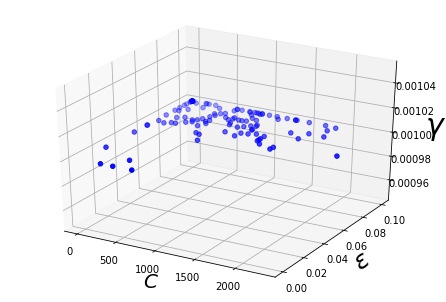






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.628583

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 341.773594

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 249.815800

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 284.937837

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 251.325103

Best Configuration Found:

SVR(C=690.2488816628161, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08260793894590632, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



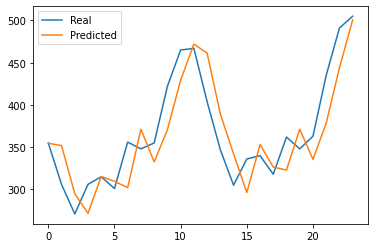


Ensemble Model series` predicitions:



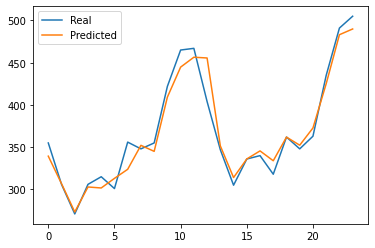


Ensemble Model best Average series` predicitions:



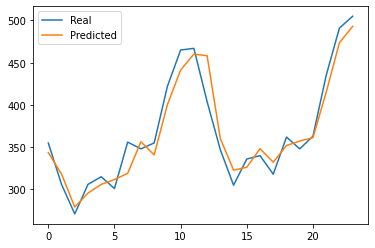


Ensemble Model K best Average series` predicitions:



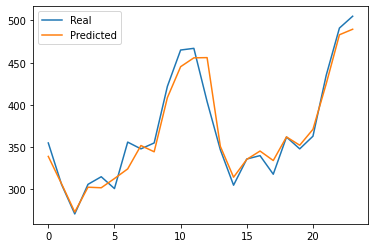


Ensemble Model best Median series` predicitions:



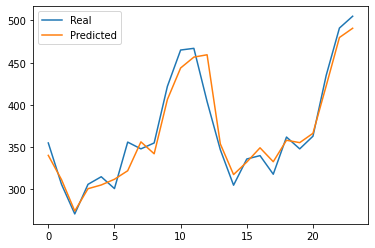


Ensemble Model K best Median series` predicitions:



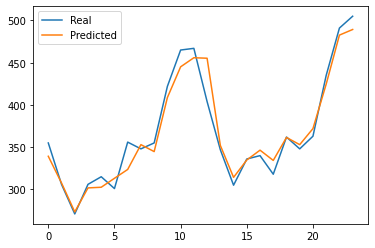






 Displaying Results for the test set



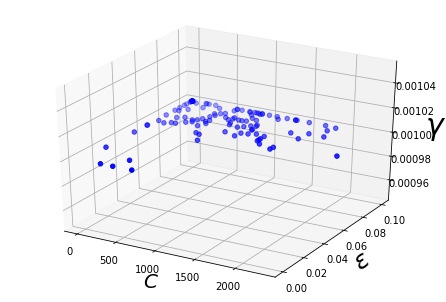






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.722977

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 904.289500

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 777.308036

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 833.077090

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 776.684919

Best Configuration Found:

SVR(C=690.2488816628161, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08260793894590632, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



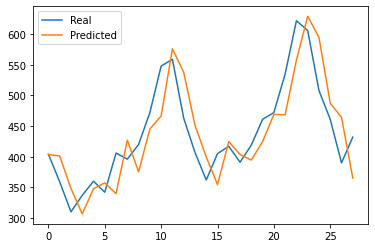


Ensemble Model series` predicitions:



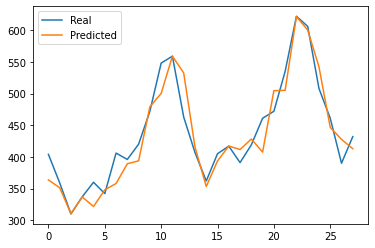


Ensemble Model best Average series` predicitions:



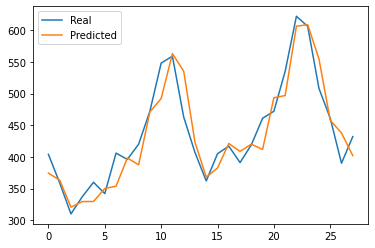


Ensemble Model K best Average series` predicitions:



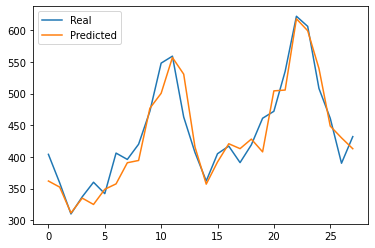


Ensemble Model best Median series` predicitions:



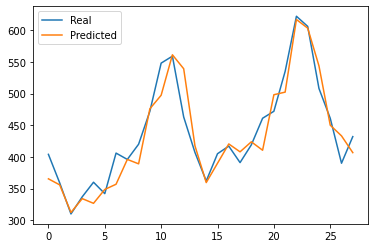


Ensemble Model K best Median series` predicitions:



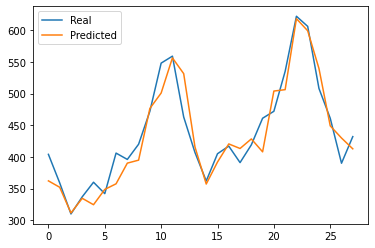






Best G-best on val set: Experiment # 4 . Mean Squared Error = 248.628583


Best G-best on test set: Experiment # 4 . Mean Squared Error = 791.722977



In [40]:
pso(120, 100, 3, 1, 5, 5)

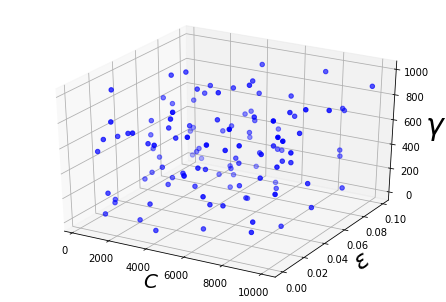






Experiment # 1: done. MSE_g_Best_val: 248.861401; MSE_AV_val: 344.506393; MSE_MD_val: 281.329316; MSE_k_AV_val: 251.415890; MSE_k_MD_val: 253.552388


MSE_g_Best: 794.001466; MSE_AV: 908.977250; MSE_MD: 814.259441; MSE_k_AV: 779.469333; MSE_k_MD: 779.345996


Experiment # 2: done. MSE_g_Best_val: 249.153174; MSE_AV_val: 364.225465; MSE_MD_val: 289.750473; MSE_k_AV_val: 248.250094; MSE_k_MD_val: 252.450945


MSE_g_Best: 795.628036; MSE_AV: 932.460439; MSE_MD: 828.903148; MSE_k_AV: 780.103392; MSE_k_MD: 780.276283


Experiment # 3: done. MSE_g_Best_val: 248.996299; MSE_AV_val: 359.564870; MSE_MD_val: 288.368486; MSE_k_AV_val: 250.242102; MSE_k_MD_val: 255.949543


MSE_g_Best: 792.819621; MSE_AV: 928.530730; MSE_MD: 847.721165; MSE_k_AV: 778.124373; MSE_k_MD: 778.199727


Experiment # 4: done. MSE_g_Best_val: 249.195496; MSE_AV_val: 333.522485; MSE_MD_val: 275.059597; MSE_k_AV_val: 250.630496; MSE_k_MD_val: 250.352978


MSE_g_Best: 793.690413; MSE_AV: 893.635566; MSE_MD: 811.390887; 

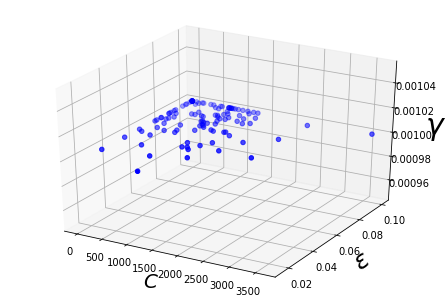






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.861401

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 344.506393

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 251.415890

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 281.329316

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 253.552388

Best Configuration Found:

SVR(C=674.8506896507902, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.082266056498799, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



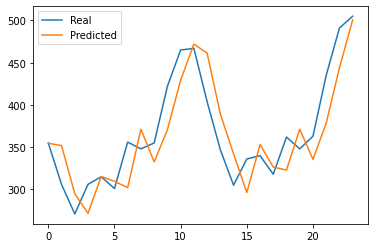


Ensemble Model series` predicitions:



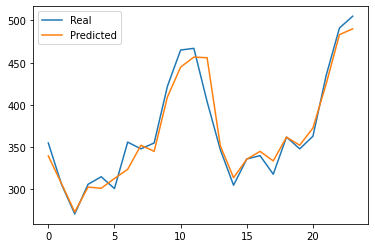


Ensemble Model best Average series` predicitions:



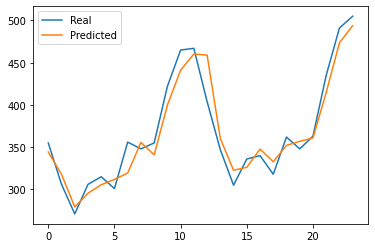


Ensemble Model K best Average series` predicitions:



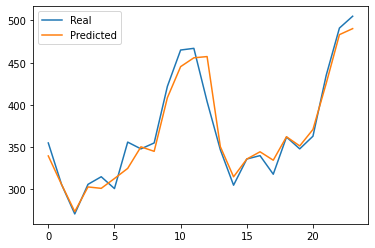


Ensemble Model best Median series` predicitions:



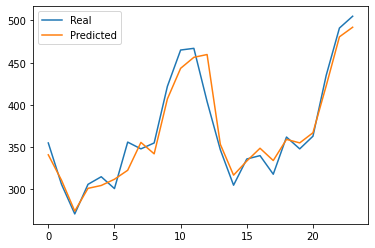


Ensemble Model K best Median series` predicitions:



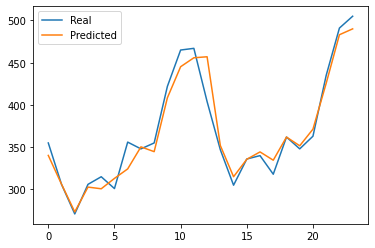






 Displaying Results for the test set



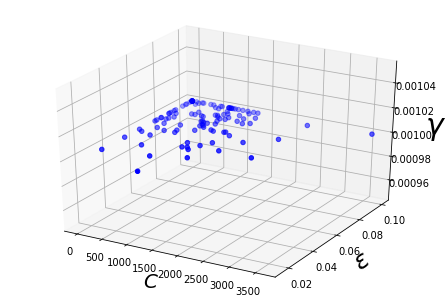






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.819621

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 928.530730

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 778.124373

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 847.721165

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 778.199727

Best Configuration Found:

SVR(C=674.8506896507902, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.082266056498799, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



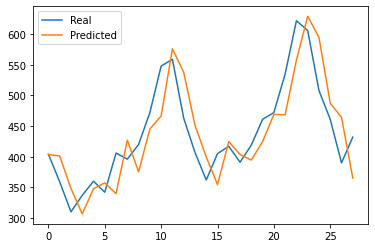


Ensemble Model series` predicitions:



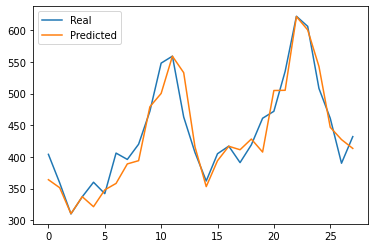


Ensemble Model best Average series` predicitions:



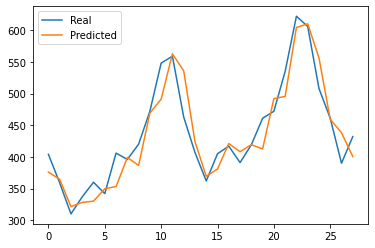


Ensemble Model K best Average series` predicitions:



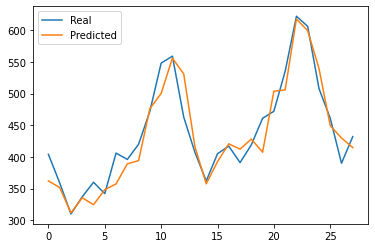


Ensemble Model best Median series` predicitions:



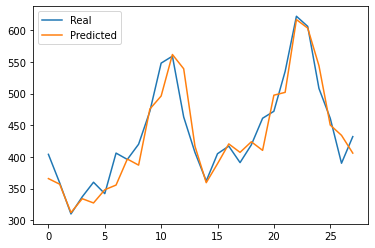


Ensemble Model K best Median series` predicitions:



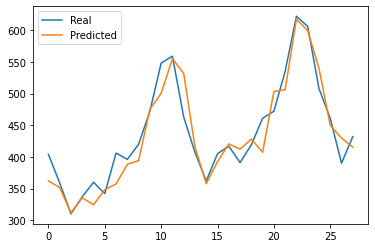






Best G-best on val set: Experiment # 1 . Mean Squared Error = 248.861401


Best G-best on test set: Experiment # 3 . Mean Squared Error = 792.819621



In [41]:
pso(120, 100, 3, 1, 10, 5)

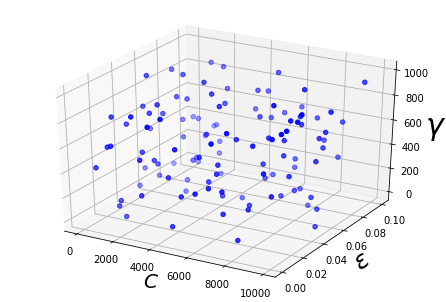






Experiment # 1: done. MSE_g_Best_val: 248.906383; MSE_AV_val: 369.278658; MSE_MD_val: 290.803035; MSE_k_AV_val: 248.903761; MSE_k_MD_val: 253.375420


MSE_g_Best: 795.755263; MSE_AV: 941.922692; MSE_MD: 853.072187; MSE_k_AV: 782.263968; MSE_k_MD: 783.230526


Experiment # 2: done. MSE_g_Best_val: 269.241681; MSE_AV_val: 275.335656; MSE_MD_val: 272.431354; MSE_k_AV_val: 270.702765; MSE_k_MD_val: 270.944920


MSE_g_Best: 875.314911; MSE_AV: 882.972831; MSE_MD: 874.526688; MSE_k_AV: 851.618982; MSE_k_MD: 852.573042


Experiment # 3: done. MSE_g_Best_val: 248.673759; MSE_AV_val: 342.223998; MSE_MD_val: 273.417904; MSE_k_AV_val: 252.118835; MSE_k_MD_val: 256.051493


MSE_g_Best: 793.778348; MSE_AV: 905.878370; MSE_MD: 807.723829; MSE_k_AV: 782.793130; MSE_k_MD: 778.401931


Experiment # 4: done. MSE_g_Best_val: 249.206770; MSE_AV_val: 356.641081; MSE_MD_val: 287.114996; MSE_k_AV_val: 251.171786; MSE_k_MD_val: 251.378174


MSE_g_Best: 791.261430; MSE_AV: 923.573438; MSE_MD: 838.492093; 

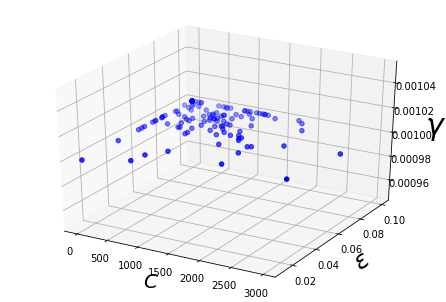






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.673759

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 342.223998

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 252.118835

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 273.417904

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 256.051493

Best Configuration Found:

SVR(C=699.6582786352876, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08299813231799301, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



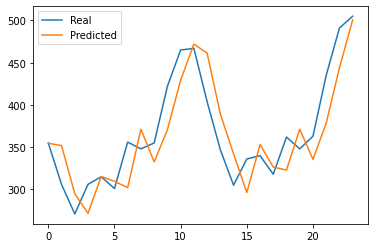


Ensemble Model series` predicitions:



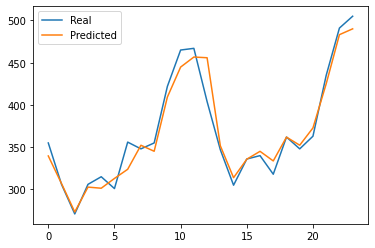


Ensemble Model best Average series` predicitions:



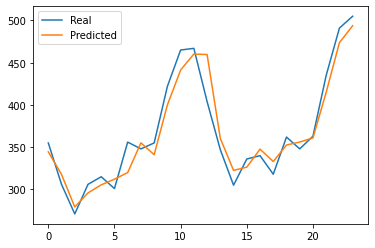


Ensemble Model K best Average series` predicitions:



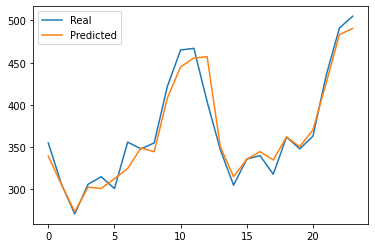


Ensemble Model best Median series` predicitions:



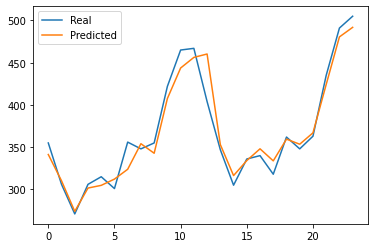


Ensemble Model K best Median series` predicitions:



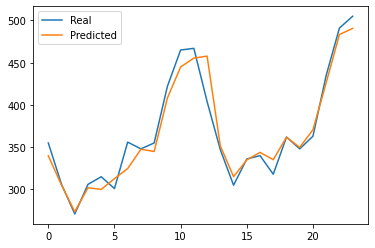






 Displaying Results for the test set



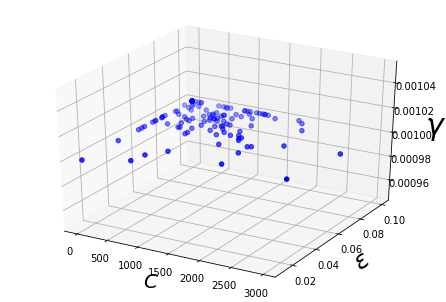






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.261430

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 923.573438

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 780.836331

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 838.492093

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 784.131408

Best Configuration Found:

SVR(C=699.6582786352876, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08299813231799301, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



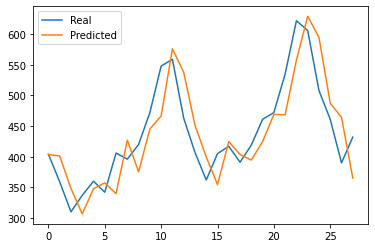


Ensemble Model series` predicitions:



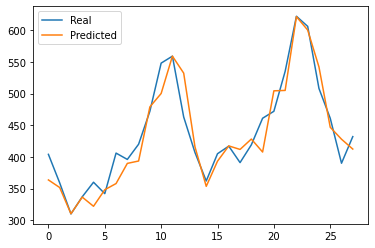


Ensemble Model best Average series` predicitions:



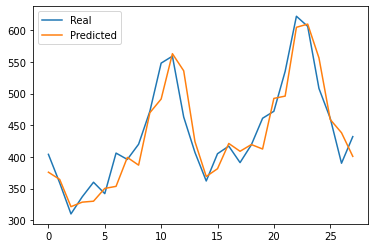


Ensemble Model K best Average series` predicitions:



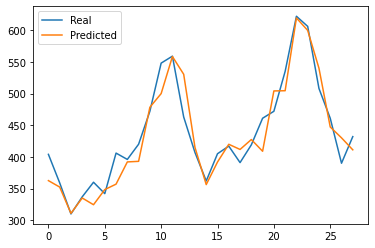


Ensemble Model best Median series` predicitions:



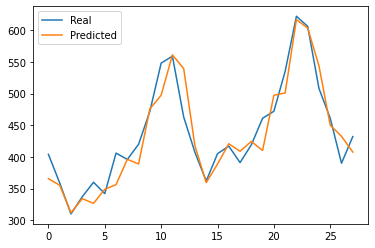


Ensemble Model K best Median series` predicitions:



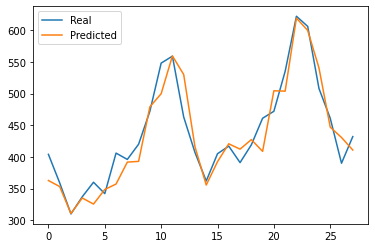






Best G-best on val set: Experiment # 3 . Mean Squared Error = 248.673759


Best G-best on test set: Experiment # 4 . Mean Squared Error = 791.261430



In [42]:
pso(120, 100, 3, 1, 20, 5)

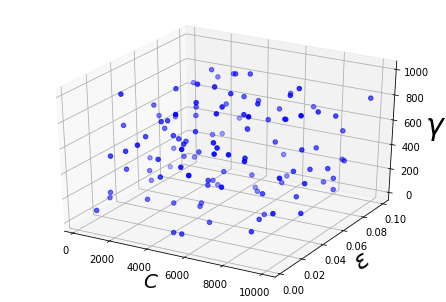






Experiment # 1: done. MSE_g_Best_val: 248.961341; MSE_AV_val: 341.850860; MSE_MD_val: 278.867707; MSE_k_AV_val: 252.530916; MSE_k_MD_val: 256.361551


MSE_g_Best: 794.780762; MSE_AV: 904.495800; MSE_MD: 816.135353; MSE_k_AV: 785.690201; MSE_k_MD: 788.438214


Experiment # 2: done. MSE_g_Best_val: 249.038644; MSE_AV_val: 396.157883; MSE_MD_val: 291.842385; MSE_k_AV_val: 254.205159; MSE_k_MD_val: 257.524180


MSE_g_Best: 792.791474; MSE_AV: 982.264677; MSE_MD: 856.101621; MSE_k_AV: 786.847609; MSE_k_MD: 785.438088


Experiment # 3: done. MSE_g_Best_val: 249.053935; MSE_AV_val: 386.729807; MSE_MD_val: 291.337121; MSE_k_AV_val: 252.279498; MSE_k_MD_val: 255.595373


MSE_g_Best: 792.688776; MSE_AV: 968.355803; MSE_MD: 848.064541; MSE_k_AV: 786.739835; MSE_k_MD: 790.150704


Experiment # 4: done. MSE_g_Best_val: 248.828792; MSE_AV_val: 360.292816; MSE_MD_val: 285.914868; MSE_k_AV_val: 253.328085; MSE_k_MD_val: 254.821084


MSE_g_Best: 792.004160; MSE_AV: 929.371426; MSE_MD: 817.863413; 

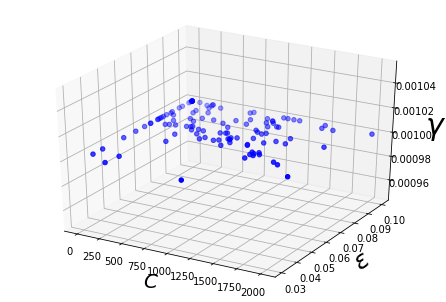






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.828792

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 360.292816

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 253.328085

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 285.914868

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 254.821084

Best Configuration Found:

SVR(C=638.7888066456403, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08266640688359492, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



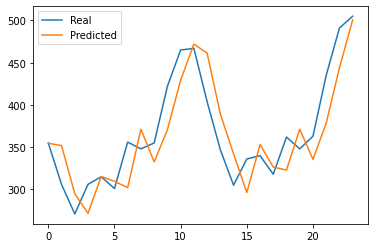


Ensemble Model series` predicitions:



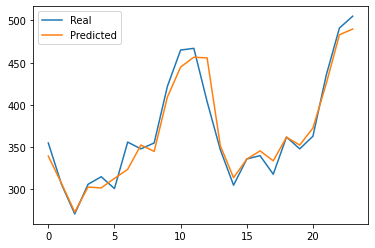


Ensemble Model best Average series` predicitions:



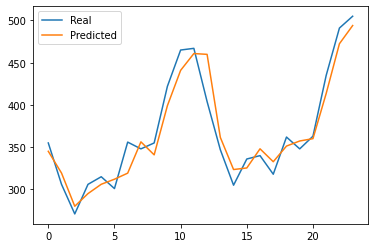


Ensemble Model K best Average series` predicitions:



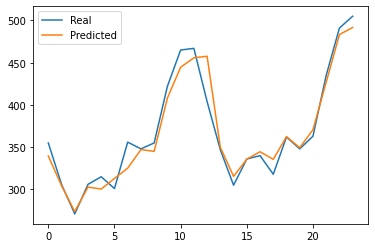


Ensemble Model best Median series` predicitions:



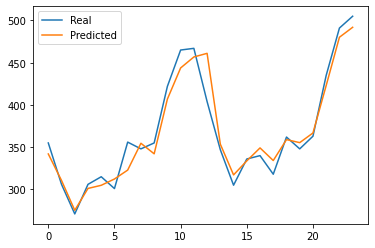


Ensemble Model K best Median series` predicitions:



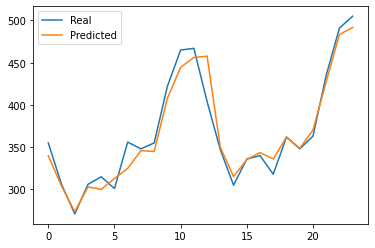






 Displaying Results for the test set



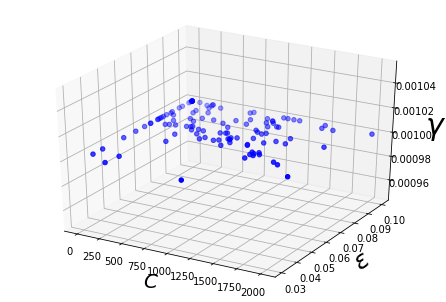






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.004160

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 929.371426

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 784.220065

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 817.863413

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 776.511815

Best Configuration Found:

SVR(C=638.7888066456403, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08266640688359492, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



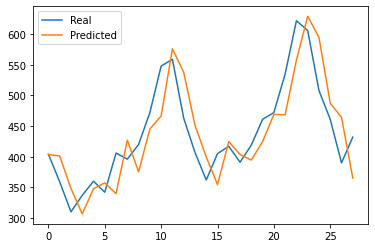


Ensemble Model series` predicitions:



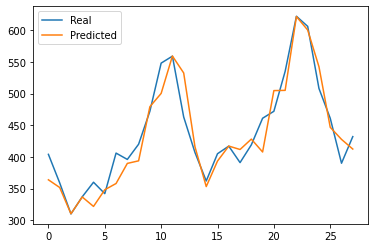


Ensemble Model best Average series` predicitions:



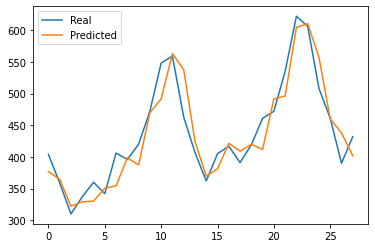


Ensemble Model K best Average series` predicitions:



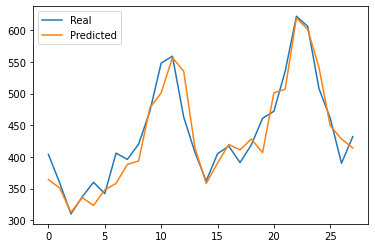


Ensemble Model best Median series` predicitions:



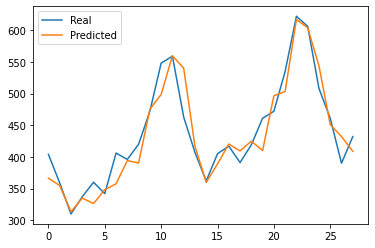


Ensemble Model K best Median series` predicitions:



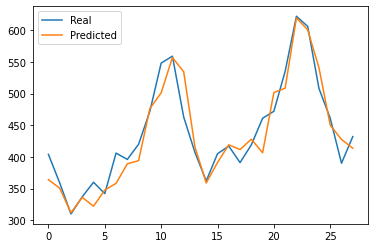






Best G-best on val set: Experiment # 4 . Mean Squared Error = 248.828792


Best G-best on test set: Experiment # 4 . Mean Squared Error = 792.004160



In [43]:
pso(120, 100, 3, 1, 30, 5)

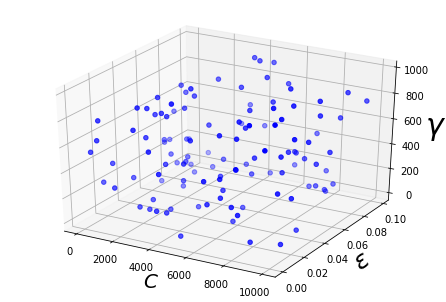






Experiment # 1: done. MSE_g_Best_val: 249.114164; MSE_AV_val: 351.635747; MSE_MD_val: 284.818928; MSE_k_AV_val: 251.306969; MSE_k_MD_val: 254.319667


MSE_g_Best: 792.138945; MSE_AV: 918.962622; MSE_MD: 831.661262; MSE_k_AV: 786.564838; MSE_k_MD: 782.260941


Experiment # 2: done. MSE_g_Best_val: 249.031535; MSE_AV_val: 349.555707; MSE_MD_val: 286.282179; MSE_k_AV_val: 252.794962; MSE_k_MD_val: 256.086261


MSE_g_Best: 795.382562; MSE_AV: 913.513412; MSE_MD: 825.769098; MSE_k_AV: 787.434934; MSE_k_MD: 786.622855


Experiment # 3: done. MSE_g_Best_val: 249.128264; MSE_AV_val: 333.456764; MSE_MD_val: 274.308279; MSE_k_AV_val: 252.568701; MSE_k_MD_val: 253.634216


MSE_g_Best: 793.254470; MSE_AV: 891.412782; MSE_MD: 811.567392; MSE_k_AV: 786.915504; MSE_k_MD: 794.653074


Experiment # 4: done. MSE_g_Best_val: 249.310911; MSE_AV_val: 351.751269; MSE_MD_val: 286.518452; MSE_k_AV_val: 253.123501; MSE_k_MD_val: 251.000065


MSE_g_Best: 795.015418; MSE_AV: 916.447359; MSE_MD: 832.726545; 

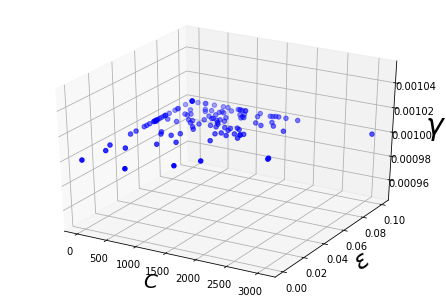






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.788990

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 341.192788

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 251.601300

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 285.972155

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 253.638602

Best Configuration Found:

SVR(C=691.5367968297087, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08258509713841514, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



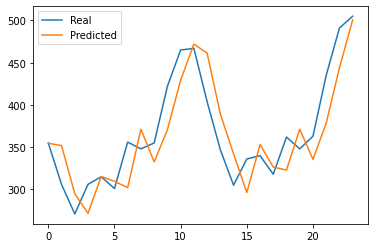


Ensemble Model series` predicitions:



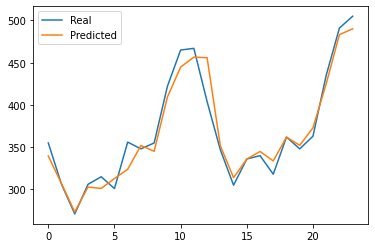


Ensemble Model best Average series` predicitions:



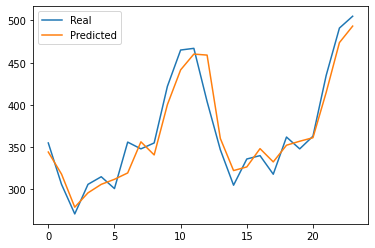


Ensemble Model K best Average series` predicitions:



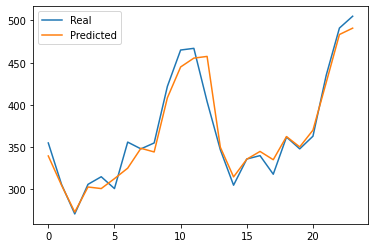


Ensemble Model best Median series` predicitions:



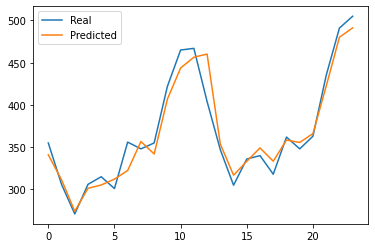


Ensemble Model K best Median series` predicitions:



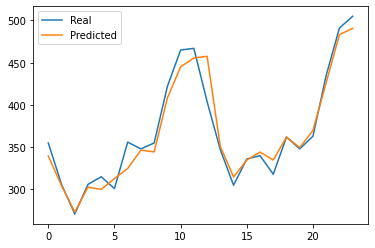






 Displaying Results for the test set



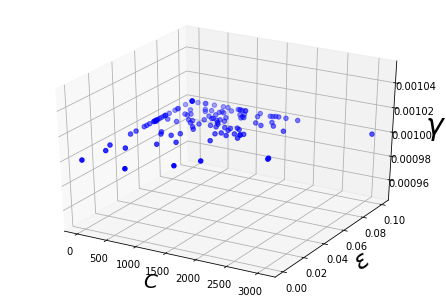






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.138945

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 918.962622

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 786.564838

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 831.661262

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 782.260941

Best Configuration Found:

SVR(C=691.5367968297087, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08258509713841514, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



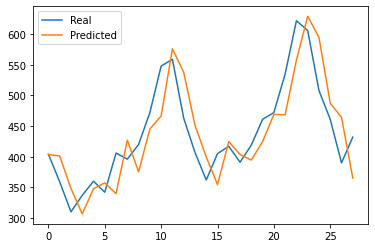


Ensemble Model series` predicitions:



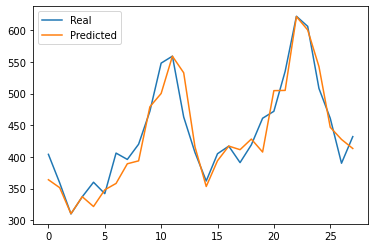


Ensemble Model best Average series` predicitions:



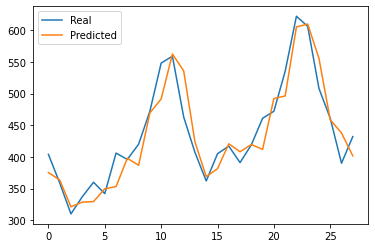


Ensemble Model K best Average series` predicitions:



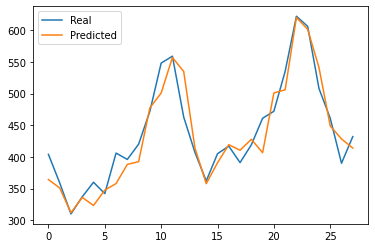


Ensemble Model best Median series` predicitions:



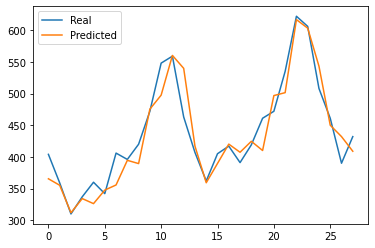


Ensemble Model K best Median series` predicitions:



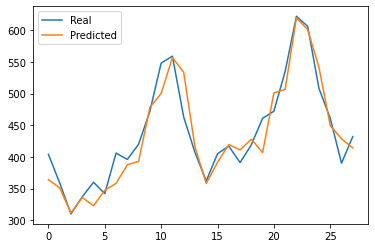






Best G-best on val set: Experiment # 5 . Mean Squared Error = 248.788990


Best G-best on test set: Experiment # 1 . Mean Squared Error = 792.138945



In [44]:
pso(120, 100, 3, 1, 40, 5)

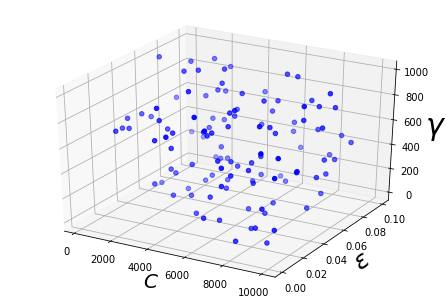






Experiment # 1: done. MSE_g_Best_val: 248.975748; MSE_AV_val: 368.732797; MSE_MD_val: 290.589035; MSE_k_AV_val: 251.756423; MSE_k_MD_val: 255.224357


MSE_g_Best: 794.616325; MSE_AV: 942.664956; MSE_MD: 854.894999; MSE_k_AV: 788.450823; MSE_k_MD: 779.438168


Experiment # 2: done. MSE_g_Best_val: 248.769574; MSE_AV_val: 355.497035; MSE_MD_val: 283.223050; MSE_k_AV_val: 254.898604; MSE_k_MD_val: 258.454505


MSE_g_Best: 792.673913; MSE_AV: 920.657453; MSE_MD: 821.263516; MSE_k_AV: 789.896629; MSE_k_MD: 794.332872


Experiment # 3: done. MSE_g_Best_val: 248.945606; MSE_AV_val: 380.845871; MSE_MD_val: 293.390036; MSE_k_AV_val: 251.391120; MSE_k_MD_val: 257.018600


MSE_g_Best: 792.586453; MSE_AV: 961.358256; MSE_MD: 854.179364; MSE_k_AV: 793.453862; MSE_k_MD: 780.628530


Experiment # 4: done. MSE_g_Best_val: 249.241918; MSE_AV_val: 389.824842; MSE_MD_val: 299.575228; MSE_k_AV_val: 253.333409; MSE_k_MD_val: 257.214777


MSE_g_Best: 794.106611; MSE_AV: 970.410643; MSE_MD: 861.730286; 

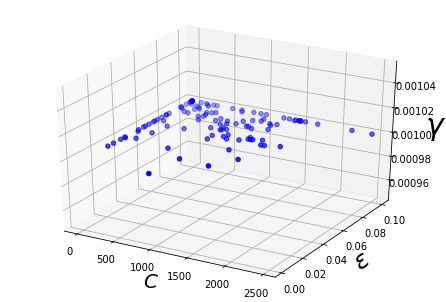






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.769574

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 355.497035

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 254.898604

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 283.223050

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 258.454505

Best Configuration Found:

SVR(C=677.6288421731085, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08277579302508084, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



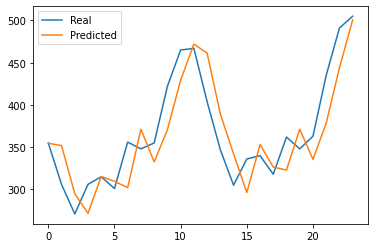


Ensemble Model series` predicitions:



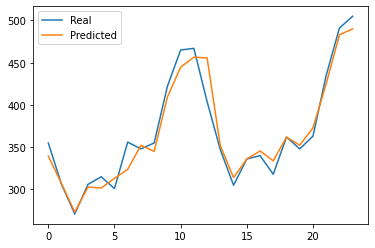


Ensemble Model best Average series` predicitions:



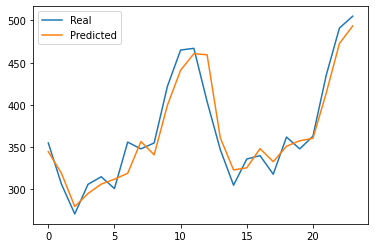


Ensemble Model K best Average series` predicitions:



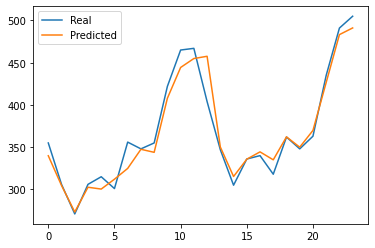


Ensemble Model best Median series` predicitions:



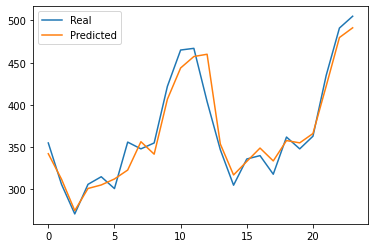


Ensemble Model K best Median series` predicitions:



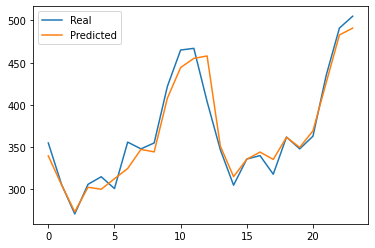






 Displaying Results for the test set



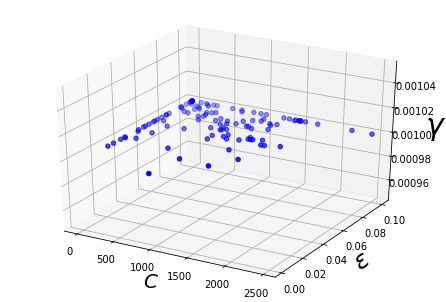






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.586453

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 961.358256

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 793.453862

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 854.179364

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 780.628530

Best Configuration Found:

SVR(C=677.6288421731085, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08277579302508084, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



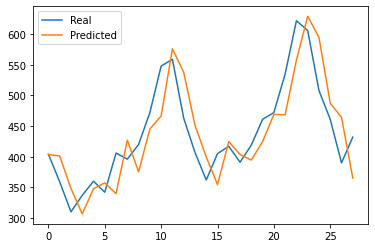


Ensemble Model series` predicitions:



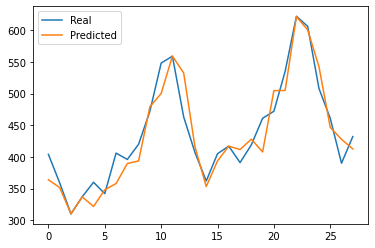


Ensemble Model best Average series` predicitions:



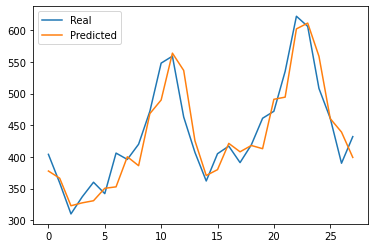


Ensemble Model K best Average series` predicitions:



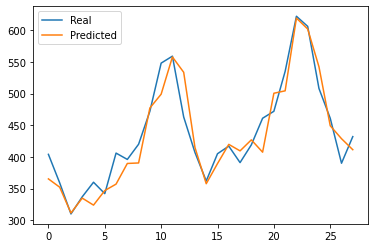


Ensemble Model best Median series` predicitions:



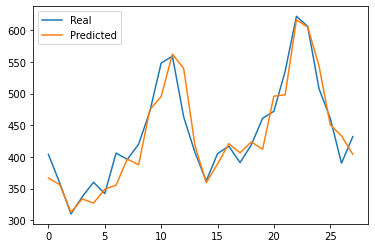


Ensemble Model K best Median series` predicitions:



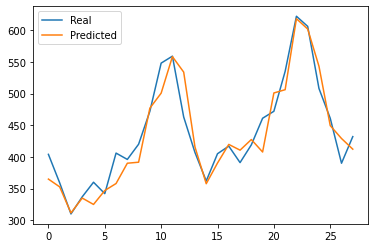






Best G-best on val set: Experiment # 2 . Mean Squared Error = 248.769574


Best G-best on test set: Experiment # 3 . Mean Squared Error = 792.586453



In [45]:
pso(120, 100, 3, 1, 50, 5)

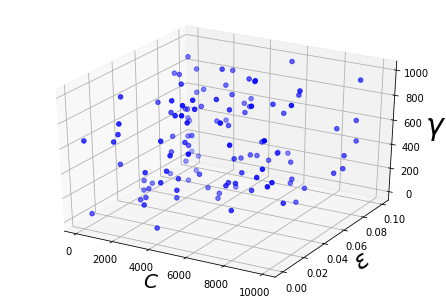






Experiment # 1: done. MSE_g_Best_val: 249.337994; MSE_AV_val: 346.206332; MSE_MD_val: 286.937534; MSE_k_AV_val: 252.917911; MSE_k_MD_val: 258.927216


MSE_g_Best: 793.924059; MSE_AV: 908.386071; MSE_MD: 824.929005; MSE_k_AV: 791.578132; MSE_k_MD: 788.377927


Experiment # 2: done. MSE_g_Best_val: 249.259634; MSE_AV_val: 346.017008; MSE_MD_val: 290.203487; MSE_k_AV_val: 252.313624; MSE_k_MD_val: 257.560973


MSE_g_Best: 793.615843; MSE_AV: 910.227303; MSE_MD: 836.061885; MSE_k_AV: 795.668083; MSE_k_MD: 797.855463


Experiment # 3: done. MSE_g_Best_val: 249.021406; MSE_AV_val: 368.677380; MSE_MD_val: 288.842459; MSE_k_AV_val: 251.195294; MSE_k_MD_val: 255.686811


MSE_g_Best: 794.904747; MSE_AV: 941.388254; MSE_MD: 827.314002; MSE_k_AV: 790.182662; MSE_k_MD: 789.175295


Experiment # 4: done. MSE_g_Best_val: 249.168713; MSE_AV_val: 348.369312; MSE_MD_val: 281.457165; MSE_k_AV_val: 252.874951; MSE_k_MD_val: 255.822228


MSE_g_Best: 795.765064; MSE_AV: 914.219671; MSE_MD: 819.099879; 

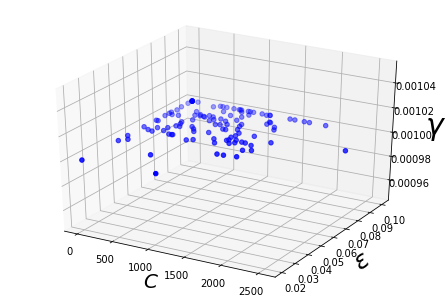






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 249.021406

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 368.677380

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 251.195294

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 288.842459

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 255.686811

Best Configuration Found:

SVR(C=684.5052077025537, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08282445629466473, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



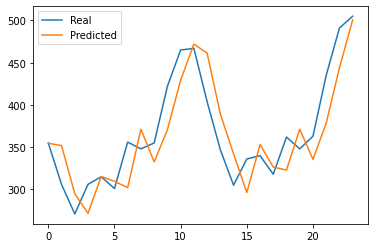


Ensemble Model series` predicitions:



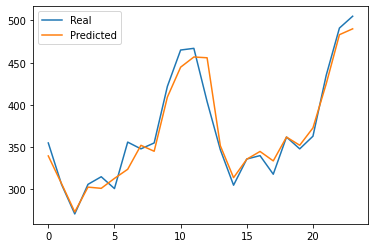


Ensemble Model best Average series` predicitions:



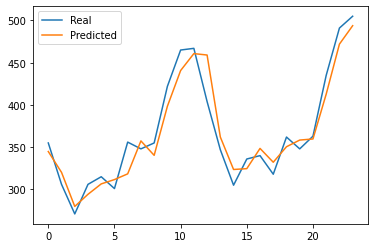


Ensemble Model K best Average series` predicitions:



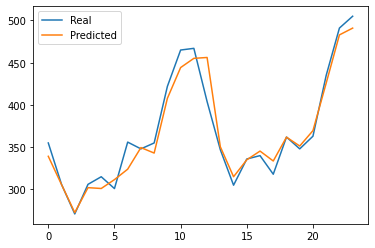


Ensemble Model best Median series` predicitions:



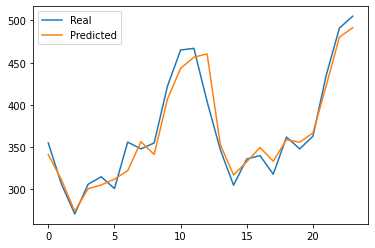


Ensemble Model K best Median series` predicitions:



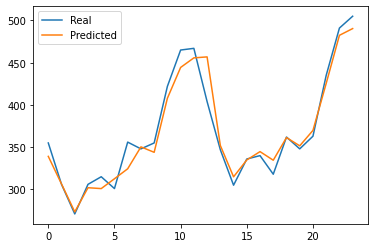






 Displaying Results for the test set



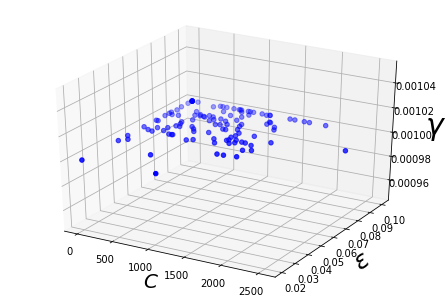






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.020579

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 883.495209

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 792.778043

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 814.541561

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 785.456840

Best Configuration Found:

SVR(C=684.5052077025537, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08282445629466473, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



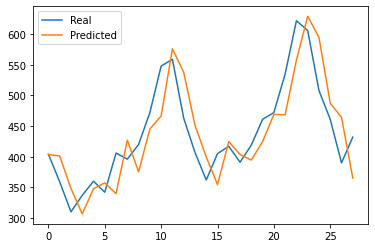


Ensemble Model series` predicitions:



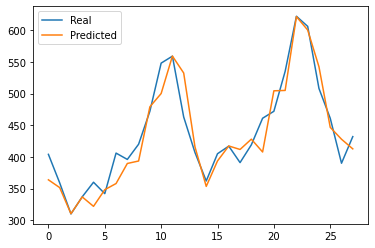


Ensemble Model best Average series` predicitions:



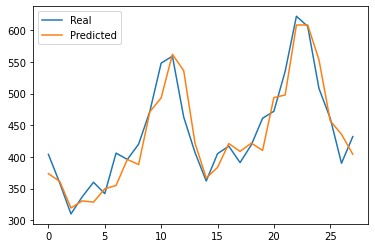


Ensemble Model K best Average series` predicitions:



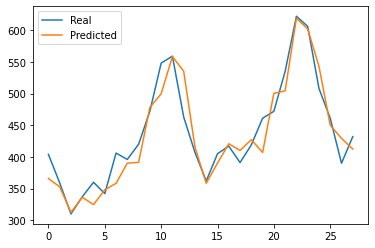


Ensemble Model best Median series` predicitions:



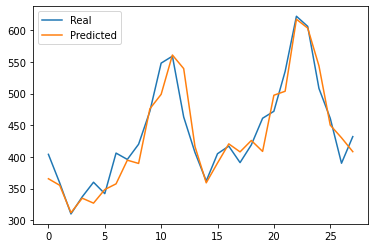


Ensemble Model K best Median series` predicitions:



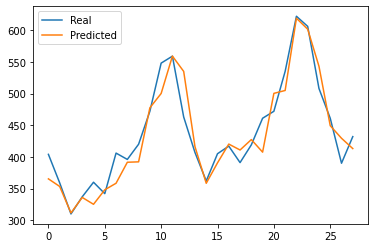






Best G-best on val set: Experiment # 3 . Mean Squared Error = 249.021406


Best G-best on test set: Experiment # 5 . Mean Squared Error = 792.020579



In [46]:
pso(120, 100, 3, 1, 60, 5)